# 感知机  
二分类模型，判别模型  


$y=f(x)=sign(wx+b)$

$sign(x)=\begin{cases}+1,&x>0\\0,&x=0\\ -1, &x<0\end{cases}$

假设训练数据是线性可分的，感知机的学习目标是求得能够将训练集正负样本完全正确分开的超平面

$y=1$ 判断为正样本

$y=-1$ 判断为负样本

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


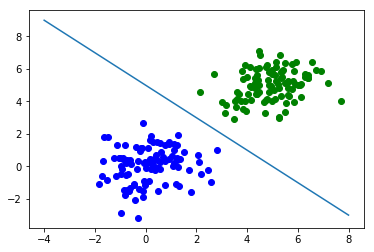

In [2]:
size = 100
x1 = np.random.multivariate_normal([0,0], [[0.1, 1], [1, 0.1]], size)
x2 = np.random.multivariate_normal([5,5], [[0.1, 1], [1, 0.1]], size)
plt.scatter(x1[:,0],x1[:,1],c='b')
plt.scatter(x2[:,0],x2[:,1],c='g')
x = np.linspace(-4,8,10)
y = -x+5
plt.plot(x, y)

设图像上直线为超平面，$wx_i+b=0$  

绿色点为正例，$wx_i+b>0$  
 
蓝色点为负例，$wx_i+b<0$  

**损失函数**  
误分类点到超平面S的总距离  

输入空间$R^n$中任一点$x_0$到超平面距离 $\frac{1}{\Arrowvert w \Arrowvert}|wx_0+b|$，其中 $\Arrowvert w \Arrowvert$是w的L2范数  (与点到直线，平面距离计算类似)

对于误分类点来说，当$wx_i+b>0$时$y_i=-1$，当$wx_i+b<0$时$y_i=1$

$\Rightarrow -y_i(wx_i+b)>0$

$\Rightarrow$ 误分类点$x_i$到超平面S的距离 $-\frac{1}{\Arrowvert w \Arrowvert}y_i(wx_i+b)$

$\Rightarrow$ 所有误分类点集合M的到超平面S的距离$ -\frac{1}{\Arrowvert w \Arrowvert}\sum_{x_i\in M} y_i(wx_i+b)$

$\Rightarrow$ 不考虑$\Arrowvert w \Arrowvert$，损失函数$L(w,b) = -\sum_{x_i\in M} y_i(wx_i+b)$

**梯度**  
$\nabla_w L(w,b) =-\sum_{x_i \in M}y_ix_i$

$\nabla_b L(w,b) =-\sum_{x_i \in M}y_i$  



In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


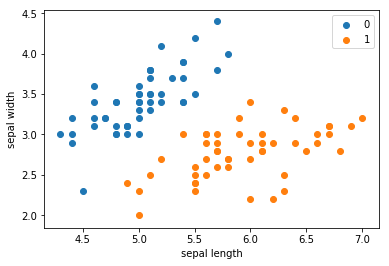

In [4]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [5]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,[0,1]], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [6]:
# 数据线性可分，二分类
class Percetron_model:
    def __init__(self):
        self.w = np.random.random(len(data[0])-1)
        self.b = np.random.random()
        self.lr = 0.1
    
    def sign(self, x, w, b):
        return np.dot(x, w) + b
    
    def fit(self, X_train, y_train):
        while True:
            wrong_count = 0
            for i in range(len(X_train)):
                x_i = X_train[i]
                y_i = y_train[i]
                if y_i * self.sign(x_i, self.w, self.b) <= 0:
                    wrong_count += 1
                    self.w += self.lr * np.dot(y_i, x_i)
                    self.b += self.lr * y_i
            if wrong_count == 0:
                break
    def predict(self, features):
        labels = []
        for feature in features:
            labels.append(1 if self.sign(feature, self.w, self.b)>0 else -1)
        return labels
    
    # 准确率
    def score(self, y_, y): 
        print((y_ == y).sum()/len(y))

In [7]:
percetron = Percetron_model()
percetron.fit(X, y)

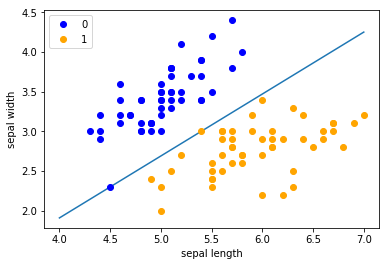

In [8]:
x_points = np.linspace(4, 7 , 10)
y_ = -(percetron.w[0]*x_points+percetron.b)/percetron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [9]:
from sklearn.linear_model import Perceptron

In [10]:
clf = Perceptron(fit_intercept=False, n_iter=1000, shuffle=False)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)

[[  74.6 -127.2]]
[0.]


D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


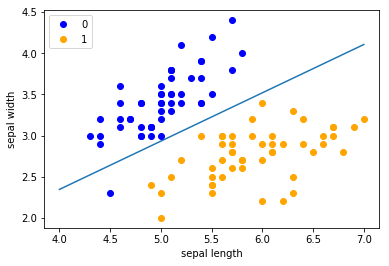

In [11]:
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

感知机算法由于采用不同的初值或选取不同的误分类点，最后的解可以不同